### Reddit's API Predicting  and Modeling

## NLP and Modeling

KIROS Gebremariam, June 2,2018

Data Science Immersive, General Assembly(DC)

#### Setup and Loading file

In [1]:
## YOUR CODE HERE

In [2]:
# importing Necessary Library
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime
import json
import os
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus


#  Configure Visual setting 
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.style.use('ggplot')
np.random.seed(42)
sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline    

#### 1 Load the Data

#### Load in the the data of scraped results

In [3]:
## YOUR CODE HERE

In [4]:
# checking the easist way of looking the files you have in the directory
import os
print(os.listdir())

['.git', '.gitignore', '.ipynb_checkpoints', '1. Data Cleaning and EDA Project 3.ipynb', '2.Exploratory Analysis and Target selection Project 3.ipynb', '3. NLP and Modeling  Project3.ipynb', 'Pro3ExpFinal.csv', 'Pro3ExpFinal0602.csv', 'Project three Presentation.ppt', 'Project3edapartone.csv', 'README.md', 'reddit-engagement-modeling-master', 'Reddit06022018.csv', 'Requirements.txt', 'starter-code.ipynb', 'title', '~$Project three Presentation.ppt']


In [5]:
# Lets load the Concatenated DataFrame and the engine specification will help to delimit the outliers
df = pd.read_csv('Pro3ExpFinal0602.csv',index_col ='Unnamed: 0' , engine='python')

##### Predicting comments using Random Forests + Another Classifier

##### 3. NATURAL LANGUAGE PROCESSING

##### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature

In [6]:
#  setting a Target variable
df['HIGH_LOW']=(df['num_comments']>df['num_comments'].median()).astype(int)
print(df.shape)
df.head()

(3300, 25)


,author,created,created_utc,domain,fetched time,gilded,id,name,num_comments,score,...,subreddit_type,thumbnail_height,thumbnail_width,title,ups,url,visited,which_sub,length,HIGH_LOW
2,JMyers666,1527758232,1527729432,v.redd.it,2018-05-31 15:35:57.507532+00:00,0,8ndytk,t3_8ndytk,1288,36191,...,public,78.0,140.0,A diver in Belize has made friends with an oc...,36191.0,https://v.redd.it/hpebu4tce3111,False,others,110,1
3,Endless_Vanity,1527712883,1527684083,i.imgur.com,2018-05-31 10:27:31.504151+00:00,0,8n88yu,t3_8n88yu,170,31998,...,public,140.0,140.0,A plum tree in Japan.,31998.0,https://i.imgur.com/AqKOm52.jpg,False,cat,22,1
4,WitnessMeIRL,1527904422,1527875622,v.redd.it,2018-06-01 20:49:52.948499+00:00,0,8ntyvl,t3_8ntyvl,69,1691,...,public,74.0,140.0,A relaxing stroll along the river,1691.0,https://v.redd.it/g2w0ug0ygf111,False,others,34,1
58,I_am_Brooks_Orpik,1527711682,1527682882,self.caps,2018-06-01 00:14:03.297542+00:00,0,8n84d6,t3_8n84d6,47,504,...,public,133.0,140.0,GRIT SCF G2 EDITION,504.0,https://www.reddit.com/r/caps/comments/8n84d6/...,False,others,20,1
3048,Fleece_It_Out_,1527782695,1527753895,imgur.com,2018-05-31 10:57:07.800747+00:00,0,8ngnlr,t3_8ngnlr,71,49,...,public,140.0,140.0,Just a little curious since no one's interest...,49.0,http://imgur.com/a/2CgPOUJ,False,others,53,1


In [7]:
X = df['subreddit']
y= df['HIGH_LOW']

In [8]:
#need to conduct a Train/Test split before creating features
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

In [9]:
# check if shapes match
print(X.shape,y.shape)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3300,) (3300,)
(2475,) (2475,)
(825,) (825,)


In [10]:
cvec =CountVectorizer(max_features = 2000)

In [11]:
cvecdata =cvec.fit_transform(X_train)

In [12]:
subrcvec = pd.DataFrame(cvecdata.todense(),      
             columns=cvec.get_feature_names())      # subreddit cvec
subrcvec.shape

(2475, 1302)

In [13]:
tvec = TfidfVectorizer(max_features = 2000,ngram_range=(1,3))
tvec.fit(X_train,y_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [14]:
tvecdata= tvec.transform(X_train,y_train)

In [15]:
X_train.shape, y_train.shape

((2475,), (2475,))

In [16]:
# Tvectorizer for training dataset
subrtvec  = pd.DataFrame(tvecdata.todense(),
                   columns=tvec.get_feature_names(),
                         index=[X_train,y_train])
subrtvec.shape

(2475, 1302)

# cvec Random Forest

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
rfc = RandomForestClassifier(class_weight='balanced_subsample')
s = cross_val_score(rfc,subrcvec, y_train, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

Random Forest Score:	0.689 ± 0.016


In [19]:
cvecdata1 =cvec.fit_transform(X_test)

In [20]:
subrcvec1 = pd.DataFrame(cvecdata1.todense(),      
             columns=cvec.get_feature_names())

In [21]:
rfc = RandomForestClassifier(class_weight='balanced_subsample')
s = cross_val_score(rfc,subrcvec1, y_test, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

Random Forest Score:	0.64 ± 0.03


In [22]:
subrcvec1.head()

,30rock,3amjokes,4panelcringe,abandonedporn,ableton,absolutelynotme_irl,accidentalrenaissance,acpocketcamp,afl,alternativeart,...,wwe,xboxone,xxfitness,yesyesyesno,yesyesyesyesno,youseeingthisshit,youshouldknow,youtubehaiku,zerowaste,zuckmemes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### MODELING EVALUATION

In [23]:
X = pd.get_dummies(df['subreddit'])
y = df['HIGH_LOW']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
# Ustandardization and applying all models at once
ss  = StandardScaler()

logreg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=14, random_state=42)
adb = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [25]:
# making pipeline for choosing best model
pipe_logreg = Pipeline([
    ('ss', ss),
    ('logreg', logreg)
])
pipe_rfc = Pipeline([
    ('ss', ss),
    ('rfc', rfc),
])
pipe_adb = Pipeline([
    ('ss', ss),
    ('adb', adb)
])

In [26]:
%%time
pipes    = [ 
    pipe_logreg, 
    pipe_rfc, 
    pipe_adb,
]
pipe_idx = {0: 'Logistic Regression', 
            1: 'Random Forest', 
            2: 'Adaboost'
           }

for idx, pipe in enumerate(pipes):
    pipe.fit(X_train, y_train)
    print('\nScore Train/Test: %s' % pipe_idx[idx])
    print(pipe.score(X_train, y_train))
    print(pipe.score(X_test, y_test))
#     print('Best params: %s' % pipe.best_params_)


Score Train/Test: Logistic Regression
0.8872727272727273
0.7284848484848485

Score Train/Test: Random Forest
0.86989898989899
0.7236363636363636

Score Train/Test: Adaboost
0.6416161616161616
0.610909090909091
CPU times: user 11.6 s, sys: 373 ms, total: 11.9 s
Wall time: 12.2 s


#### LOGISTIC REGRESSION

In [27]:
logreg = LogisticRegression()
model=logreg.fit(X_train, y_train)     # fitting the training data

In [28]:
scores = cross_val_score(model, X_train, y_train, cv=5)  # cross Validation
np.mean(scores), np.std(scores) #  scoring the performance of training data

(0.7183801083843528, 0.006237860290084136)

In [29]:
logreg = LogisticRegression()
scores = cross_val_score(logreg,  X_test, y_test,  cv=5)
np.mean(scores), np.std(scores)    # scoring on my Testing Data under performs also

(0.6739737664627469, 0.016044418682368528)

In [30]:
# Predicting the  y values on the testing  Random Forest Classifier
#fit on the training, predict on the testing data

y_hat = model.predict(X_test)

In [31]:
# ACCURACY of the model
accuracy=100*metrics.accuracy_score(y_test, y_hat)
print(accuracy)

72.84848484848484


In [32]:
# A confusion matrix tells us our false positives and false negatives:
mx = confusion_matrix(y_test, y_hat)
print (mx)

[[355  73]
 [151 246]]


In [33]:
#  Now lets interprete the confusion matrix as follows
tn, fp, fn, tp = mx.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 61.9647355163728
specificity: 82.94392523364486


In [34]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
roc_score=100*roc_auc_score(y_test, y_hat)
print(roc_score)

72.45433037500884


In [35]:
# creating dataframe of matrix  and adding the confusion matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_hat), 
                                              columns=['predicted_High(1)', 'predicted_low(0)'], 
                      index=['is_High(1)', 'is_Low(0)'])

In [36]:
confusion_mat

,predicted_High(1),predicted_low(0)
is_High(1),355,73
is_Low(0),151,246


In [37]:
print("\nClassification Report:\n",classification_report(y_test, y_hat))
# recall is sensetivity, shows confusion matrix scoring


Classification Report:
              precision    recall  f1-score   support

          0       0.70      0.83      0.76       428
          1       0.77      0.62      0.69       397

avg / total       0.74      0.73      0.73       825



In [38]:
#Tells us the probablity of a Reddit will be correctly identified in the class its assigned
lr_y_score = model.predict_proba(X_test)[:, 1] #[:,1] is formatting the output
lr_y_score

array([0.44034152, 0.44034152, 0.44034152, 0.44034152, 0.6755737 ,
       0.39521824, 0.44034152, 0.44034152, 0.35543939, 0.35543939,
       0.83245945, 0.44034152, 0.44034152, 0.6755737 , 0.44034152,
       0.46009425, 0.44034152, 0.35543939, 0.46009425, 0.43289562,
       0.5236502 , 0.55189376, 0.46009425, 0.62490442, 0.44034152,
       0.44034152, 0.44034152, 0.80854738, 0.44034152, 0.44034152,
       0.46009425, 0.44034152, 0.44034152, 0.30111304, 0.44034152,
       0.44034152, 0.55189376, 0.55189376, 0.55189376, 0.44034152,
       0.44034152, 0.55189376, 0.44034152, 0.44034152, 0.35543939,
       0.35543939, 0.44034152, 0.55189376, 0.62490442, 0.88167415,
       0.55189376, 0.53713586, 0.83245945, 0.44034152, 0.41813331,
       0.84534979, 0.44034152, 0.44034152, 0.47004616, 0.44034152,
       0.46009425, 0.44034152, 0.44034152, 0.44034152, 0.6755737 ,
       0.34753269, 0.44034152, 0.44034152, 0.35543939, 0.44034152,
       0.5236502 , 0.44034152, 0.71280007, 0.44034152, 0.55189

#### RANDON FOREST CLASSIFIER

In [39]:
rfc = RandomForestClassifier(max_depth = 10, n_estimators=5, random_state=42)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)       # scoring the  on test Data

0.5733333333333334

In [40]:
rfc = RandomForestClassifier()
model=rfc.fit(X_train, y_train)     # fitting the training data

In [41]:
scores = cross_val_score(model, X_train, y_train, cv=5)  # cross Validation
np.mean(scores), np.std(scores) #  scoring the performance of training data

(0.7103025553959339, 0.010276085521952217)

In [42]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc,  X_test, y_test,  cv=5)
np.mean(scores), np.std(scores)    # scoring on my Testing Data under performs also

(0.6582452203492462, 0.022714816055981978)

In [43]:
# Predicting the  y values on the testing  Random Forest Classifier
#fit on the training, predict on the testing data

y_hat = model.predict(X_test)

In [44]:
# ACCURACY of the model
accuracy=100*metrics.accuracy_score(y_test, y_hat)
print(accuracy)

72.84848484848484


In [45]:
# A confusion matrix tells us our false positives and false negatives:
mx = confusion_matrix(y_test, y_hat)
print (mx)

[[358  70]
 [154 243]]


In [46]:
#  Now lets interprete the confusion matrix as follows
tn, fp, fn, tp = mx.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 61.20906801007557
specificity: 83.64485981308411


In [47]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
roc_score=100*roc_auc_score(y_test, y_hat)
print(roc_score)

72.42696391157983


In [66]:
# create dataframe of matrix  and then inputting the confusion matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_hat), 
                                              columns=['predicted_High(1)', 'predicted_low(0)'], 
                      index=['is_High(1)', 'is_Low(0)'])

In [67]:
confusion_mat

,predicted_High(1),predicted_low(0)
is_High(1),113,380
is_Low(0),76,421


In [68]:
print("\nClassification Report:\n",classification_report(y_test, y_hat))
# recall is sensetivity, shows confusion matrix scoring


Classification Report:
              precision    recall  f1-score   support

          0       0.60      0.23      0.33       493
          1       0.53      0.85      0.65       497

avg / total       0.56      0.54      0.49       990



In [48]:
rfc = RandomForestClassifier()
model=rfc.fit(X_train, y_train) # just to run the next line

In [49]:
#Tells us the probablity of a Reddit will be correctly identified in the class its assigned
clf_y_score = rfc.predict_proba(X_test)[:, 1] #[:,1] is formatting the output
clf_y_score

array([0.        , 0.        , 0.        , 0.        , 1.        ,
       0.36      , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.9       , 0.        ,
       0.45833333, 0.        , 0.        , 0.21666667, 0.36873016,
       0.64583333, 0.6       , 0.35      , 1.        , 0.        ,
       0.        , 0.        , 0.91351107, 0.        , 0.        ,
       0.4       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.8       , 0.5       , 0.7       , 0.        ,
       0.        , 0.9       , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.4       , 1.        , 1.        ,
       0.7       , 0.81      , 1.        , 0.        , 0.2547619 ,
       0.94659426, 0.        , 0.        , 0.54047619, 0.        ,
       0.46      , 0.        , 0.        , 0.        , 0.8       ,
       0.17595238, 0.        , 0.        , 0.        , 0.        ,
       0.59660173, 0.        , 0.9       , 0.        , 0.4    

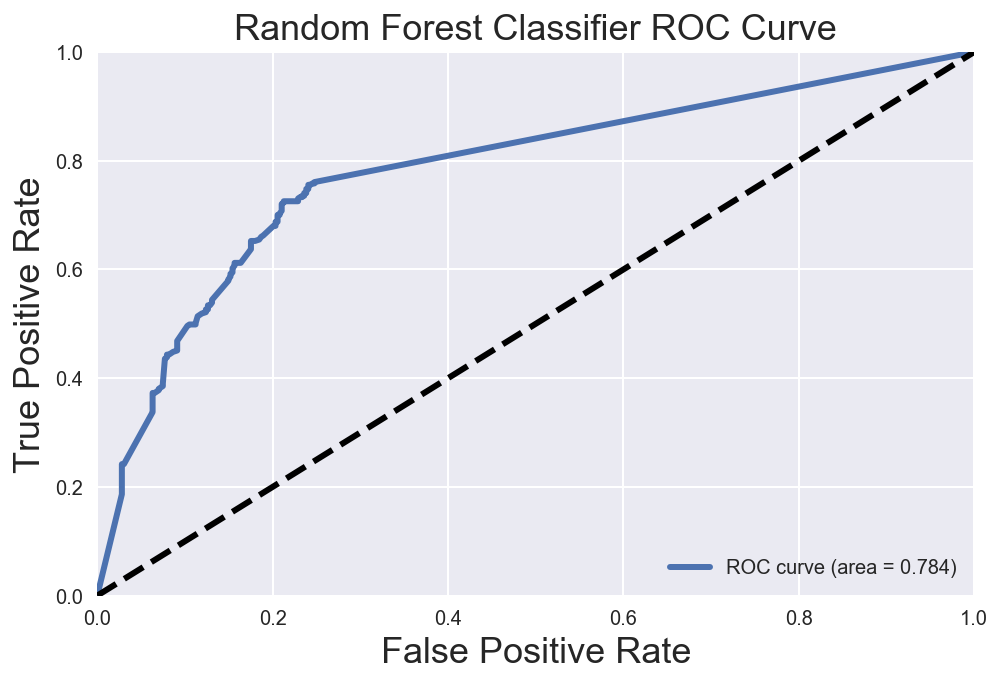

In [50]:
clf_FPR = dict()
clf_TPR = dict()
clf_ROC_AUC = dict()

clf_FPR[1], clf_TPR[1], _ = roc_curve(y_test, clf_y_score)
clf_ROC_AUC[1] = auc(clf_FPR[1], clf_TPR[1])

plt.figure(figsize=[7,5])
plt.plot(clf_FPR[1], clf_TPR[1], label='ROC curve (area = %0.3f)' % clf_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### KNN

In [51]:
# importing Libraries and their packages
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [52]:
med=np.median(df.num_comments)
med

38.0

In [53]:
df['target']=df.num_comments.map(lambda x: 1 if x>=med else 0)

In [54]:
#reset x and y to high/low and subreddit#reset x a 
y = df['target']
X = df['subreddit']

cvec = CountVectorizer(stop_words = 'english') 

X  = pd.DataFrame(cvec.fit_transform(X).todense(),
             columns=cvec.get_feature_names())

In [55]:
# Put it into  standard scalar# Put it i 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)
type(Xs)
Xs

array([[-0.0174104 , -0.02462576, -0.0174104 , ..., -0.0174104 ,
        -0.02462576, -0.0174104 ],
       [-0.0174104 , -0.02462576, -0.0174104 , ..., -0.0174104 ,
        -0.02462576, -0.0174104 ],
       [-0.0174104 , -0.02462576, -0.0174104 , ..., -0.0174104 ,
        -0.02462576, -0.0174104 ],
       ...,
       [-0.0174104 , -0.02462576, -0.0174104 , ..., -0.0174104 ,
        -0.02462576, -0.0174104 ],
       [-0.0174104 , -0.02462576, -0.0174104 , ..., -0.0174104 ,
        -0.02462576, -0.0174104 ],
       [-0.0174104 , -0.02462576, -0.0174104 , ..., -0.0174104 ,
        -0.02462576, -0.0174104 ]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [57]:
knn = KNeighborsClassifier( n_neighbors=3,  
                           weights='uniform')
scores = cross_val_score(knn,  X_train, y_train,  cv=5)
model = knn.fit(X_train, y_train)
np.mean(scores), np.std(scores)   # scoring on my Training Data set was really worst

(0.5398400919429953, 0.0128042267449172)

In [58]:
knn= KNeighborsClassifier( n_neighbors=3,  
                           weights='uniform')
scores = cross_val_score(knn,  X_test, y_test,  cv=5)
np.mean(scores), np.std(scores)    # scoring on my Testing Data set the same so similar to the training data set 

(0.5627954158321733, 0.0740872198041901)

In [59]:
y_hat=model.predict(X_test)

In [60]:
# create dataframe of matrix  and then inputting the confusion matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_hat), 
                                              columns=['predicted_High(1)', 'predicted_low(0)'], 
                      index=['is_High(1)', 'is_Low(0)'])

In [61]:
confusion_mat

,predicted_High(1),predicted_low(0)
is_High(1),113,380
is_Low(0),76,421


In [62]:
print("\nClassification Report:\n",classification_report(y_test, y_hat))
# recall is sensetivity, shows confusion matrix scoring


Classification Report:
              precision    recall  f1-score   support

          0       0.60      0.23      0.33       493
          1       0.53      0.85      0.65       497

avg / total       0.56      0.54      0.49       990



In [63]:
len(set(df.title))

3269

In [64]:
df.title.astype(str)

2        A diver in Belize has made friends with an oc...
3                                   A plum tree in Japan.
4                       A relaxing stroll along the river
58                                    GRIT SCF G2 EDITION
3048     Just a little curious since no one's interest...
5                       Lava looking like melted plastic 
6        Like this image to have an event occur somewh...
7        Like this image to have an event occur somewh...
57       Number of incels who actually care about our ...
8                                     The Hottest Couple 
9                       The Hottest Couple , I love dammn
68       Zidane resigns as Real Madrid manager. Potent...
3288     pessoal, temos um problema. O parlamento euro...
10       pessoal, temos um problema. O parlamento euro...
11       super late to the trend but I too was inspire...
12                                     !remindme one year
13      "ARAB ANDY" scares the shit out of a college c...
14      "Cable

# Executive Summary
---
Put your executive summary in a Markdown cell below.

I have scrapped 31,975 posts  using the HotJson API for seven days.  The timing was arranged to be in the morning and afternoon and finally after removing duplicates and conducting the data munging I  have left with only 3300 posts. The Data collection  and data cleaning took a significant  portion of the time. In the first step, I did some feature analysis. Then I picked up score, title, subreddits and number of comments as my target.  In order to answer and satisfy my goal i reviewed and assesed  variety of models i have been thought in my Data science Immersive course and to determine the best  possible approach to accurately predicting the factors that lead to a popular post , here when i say popular post; its a post defined  with greater than the median number of comments from the collected dataset. After going through all the exploratory data analysis, knowing the multidimensionality of the data elements. I focused on  analysing the data of greatest importance on Reddit I have opted to use a classifier analysis looking at a wide variety of factors.i chosed to see and  investigate the effect of titles on the popularity of a reddit posts.  The stage after  cleaning and munging real data of reddit API, i start manipulating the data for analysis purpose and then after this i scaled the data to check the dimension compatibility and comparability. After going through I then updated my model to gauge the effect of adding several features to the model. I have applied count vectorizer and found the most common words as well as i found that posts with less than 40 characters were the most commented by the reddit users.  As reddit is one of the top three most visited website  in the united states focusing on short titles and using  the third quantile of the number of comments by subreddit, i found out that Askreddit was the most visited site followed by worldnews,technologysubreddit,personalfinance and videos.  Finally, I have picked  Logistic regression,RandomForest Classifier as my model. I found a model that accurately predicts the whether or not a post will be popular with about  72% accuracy on a consistent basis. My predictive features (title,subreddit, num_comments) were highly effective in other models as well. Ultimately the most effective model selected in my analysis was LogisticRegressionClassifier. My findings suggest that this is a highly effective model which has the potential for further analysis both within the reddit sight. I believe this analysis can also be replicated in the same site or other similar websites to other post base discussion and social media sites. 

### BONUS
Refer to the README for the bonus parts

In [65]:
## YOUR CODE HERE